<h1><center>Project 5: Categoriser des questions automatiquement</center></h1>

### TABLE OF CONTENTS
#### Project display
#### 1. Data Extractions And Exploratory Analysis
* 1-1. Importing Python modules
* 1-2. Get the Data
* 1-3. Data Preparation & Data Cleaning
* * 1-3-1. Data cleaning: NaN
* * 1-3-2. Data cleaning: Duplicates
* * 1-3-2. Data cleaning: Outliers
* 1-4. Feature Engineering: new features 

### 1. Get the Data and Exploratory Analysis

### 1.1. Importing Python Libraries and dependencies

In [1]:
from stackoverflow_analysis_function import *

%pylab inline
%matplotlib inline
# Full display of DataFrames.
pd.set_option("expand_frame_repr", True)

Populating the interactive namespace from numpy and matplotlib


### 1.1. Get the data

In [2]:
# Import the data file:
path = "../Data/"
df = get_file(path)

In [3]:
# shape of the dataframe
df.shape

(50000, 9)

In [4]:
# Get information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50000 non-null  int64 
 1   CreationDate  50000 non-null  object
 2   Title         50000 non-null  object
 3   Body          50000 non-null  object
 4   Tags          50000 non-null  object
 5   ViewCount     50000 non-null  int64 
 6   CommentCount  50000 non-null  int64 
 7   AnswerCount   50000 non-null  int64 
 8   Score         50000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.4+ MB


In [5]:
df.head(3)

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score
0,3631531,2010-09-02 21:42:52,Extract Exchange 2007 Public Calendar Appointm...,<p>We have a public calendar for our company s...,<c#><asp.net><web-services><exchange-server-20...,14024,5,2,25
1,3631536,2010-09-02 21:43:21,jQuery: Finding cloned child in cloned parent?,<p>Let's say I have this jQuery extension meth...,<javascript><jquery><clone>,1525,3,3,3
2,64252344,2020-10-07 21:10:06,How to Refresh the UI in ListView.Builder usin...,<p><em>I'm refactoring my app to GetX state ma...,<flutter><dart><bloc><state-management><flutte...,16638,6,4,8


### 1.2. Exploratory data analysis

#### 1.2.1 Handling of missing values

In [6]:
# We check the NaNs values for each variable.
Check_NaN(df)

Id              0.0
CreationDate    0.0
Title           0.0
Body            0.0
Tags            0.0
ViewCount       0.0
CommentCount    0.0
AnswerCount     0.0
Score           0.0
dtype: float64


**Note that there are no missing values.**

#### 1.2.2 analysis of "CreationDate".

In [7]:
# Convert CreationDate feature to datetime.
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

In [8]:
# print of the first and the last data.
print(df.CreationDate.min(), df.CreationDate.max())

2008-07-31 21:42:52 2021-12-20 12:12:39


In [9]:
# the time interval between the 1st data and the last one.
(df.CreationDate.max().year- df.CreationDate.min().year)

13

#### 1.2.3 - Analysis of "Score".

In [10]:
df.Score.describe()

count    50000.000000
mean        32.462860
std        232.300294
min          3.000000
25%          4.000000
50%          6.000000
75%         15.000000
max      26163.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

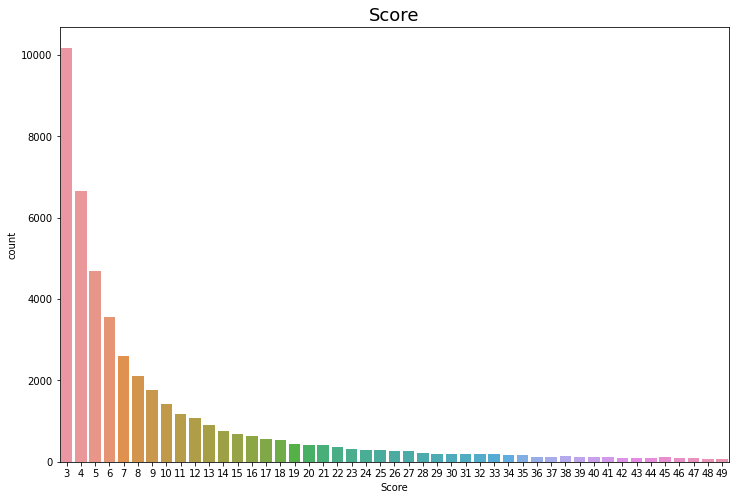

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Score[df.Score<50])
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(0, end, 50))
ax.set_xlabel("Score")
plt.title("Score", fontsize=18)

#### 1.2.4 - Analysis of "Title"

In [12]:
df.Title.str.len().describe()

count    50000.000000
mean        51.916720
std         19.877499
min         11.000000
25%         38.000000
50%         49.000000
75%         63.000000
max        150.000000
Name: Title, dtype: float64

Text(0.5, 1.0, 'Title lenghts')

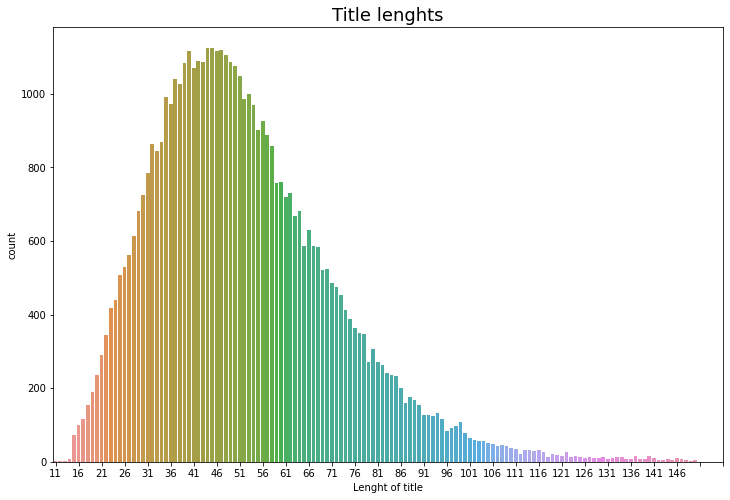

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Title.str.len())
#start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, df.Title.str.len().max(), 5))
ax.set_xlabel("Lenght of title")
plt.title("Title lenghts", fontsize=18)

#### 1.2.5 - Analysis of "Body"

In [14]:
df.Body.str.len().describe()

count    50000.000000
mean      1401.005860
std       1828.948663
min         25.000000
25%        512.000000
50%        909.000000
75%       1626.000000
max      33306.000000
Name: Body, dtype: float64

Text(0.5, 1.0, 'Body lenghts')

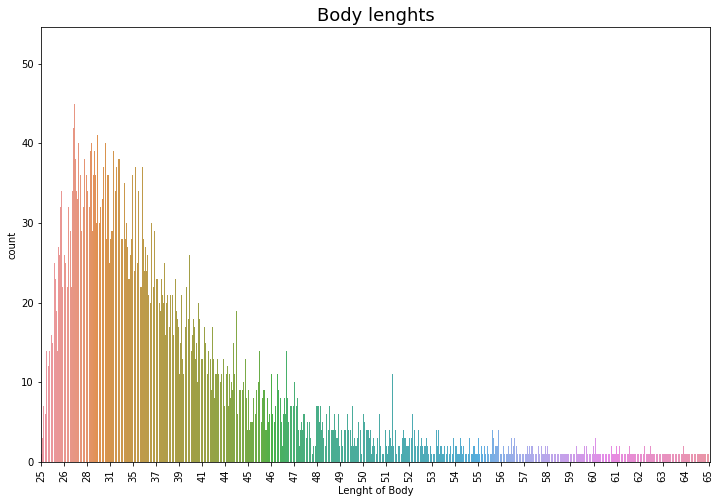

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Body.str.len())
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 200))
#ax.set_xticks(np.arange(0, 2000, 200))
ax.set_xlabel("Lenght of Body")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Body lenghts", fontsize=18)

#### 1.2.6 - Analysis of "Tags"

In [16]:
df.Tags.str.len()

0        66
1        27
2        53
3         8
4        13
         ..
49995    41
49996    16
49997    45
49998    20
49999    40
Name: Tags, Length: 50000, dtype: int64

Text(0.5, 1.0, 'Tags lenghts')

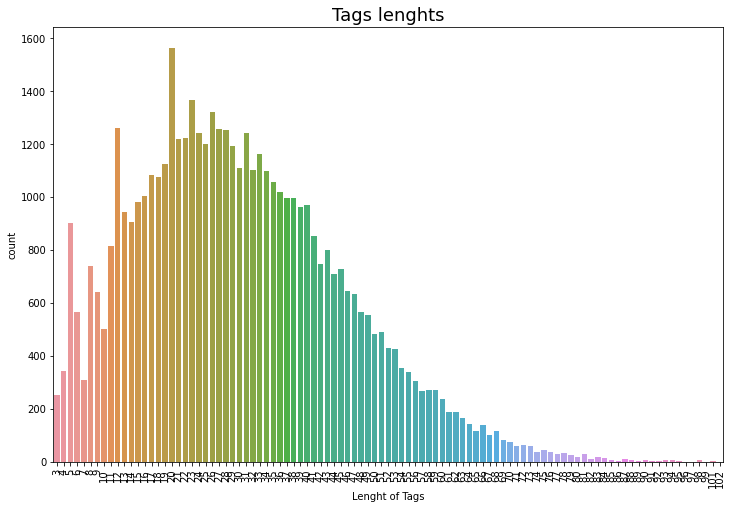

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Tags.str.len())
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(0, end, 200))
#ax.set_xticks(np.arange(0, 2000, 200))
ax.set_xlabel("Lenght of Tags")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Tags lenghts", fontsize=18)

In [18]:
df.Tags.head()

0    <c#><asp.net><web-services><exchange-server-20...
1                          <javascript><jquery><clone>
2    <flutter><dart><bloc><state-management><flutte...
3                                             <python>
4                                        <java><swing>
Name: Tags, dtype: object

In [19]:
df['Tags'] = replace_balise(df, 'Tags')

In [20]:
df.Tags.head()

0    c#,asp.net,web-services,exchange-server-2007,e...
1                              javascript,jquery,clone
2      flutter,dart,bloc,state-management,flutter-getx
3                                               python
4                                           java,swing
Name: Tags, dtype: object

In [21]:
tags_words = count_split_tags(df, 'Tags', ',')
print("The dataset counts 10 {} tags.".format(tags_words.shape[0]))

The dataset counts 10 12494 tags.


In [22]:
tags_words.head()

,tag_count
Tag,
c#,5695
java,5146
javascript,4600
c++,4582
python,3904


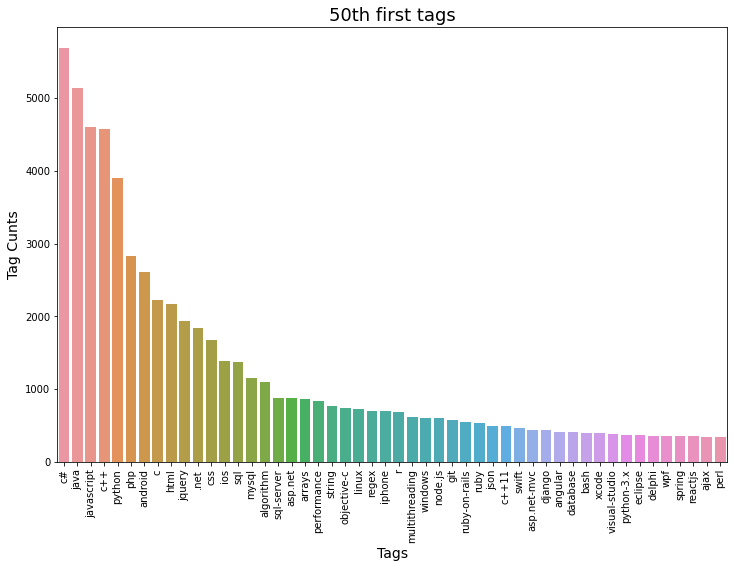

In [23]:
# Plot the results of splits
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(data=tags_words.iloc[0:50, :],
            x=tags_words.iloc[0:50, :].index,
            y="tag_count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("50th first tags", fontsize=18)
ax.set_xlabel("Tags", size=14)
ax.set_ylabel("Tag Cunts", size=14)
plt.show()

**The tags presented in the graph represent the most popular tags in the dataset, but the goal is to propose tags so it is mandatory to check the trend: it is useless to propose tags that are no longer used, knowing that in ten years, programming languages have evolved a lot.**

In [24]:
# Subplots parameters
years = np.arange(df.CreationDate.min().year, df.CreationDate.max().year+1)

2008-07-31 21:42:52 2008-12-26 20:27:35
            tag_count
Tag                  
c#                172
c++               113
.net               96
java               80
javascript         68
...               ...
hyperlink           1
icalendar           1
identicon           1
idioms              1
zsh                 1

[1144 rows x 1 columns]
2008


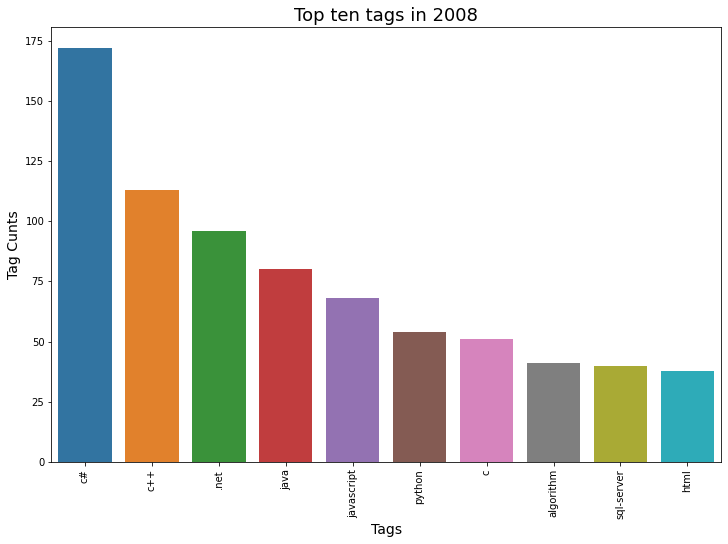

2009-01-04 13:37:56 2009-12-08 11:34:27
               tag_count
Tag                     
c#                   760
c++                  487
java                 473
.net                 359
python               337
...                  ...
mnemonics              1
mms                    1
mks-integrity          1
mks                    1
zune-hd                1

[3052 rows x 1 columns]
2009


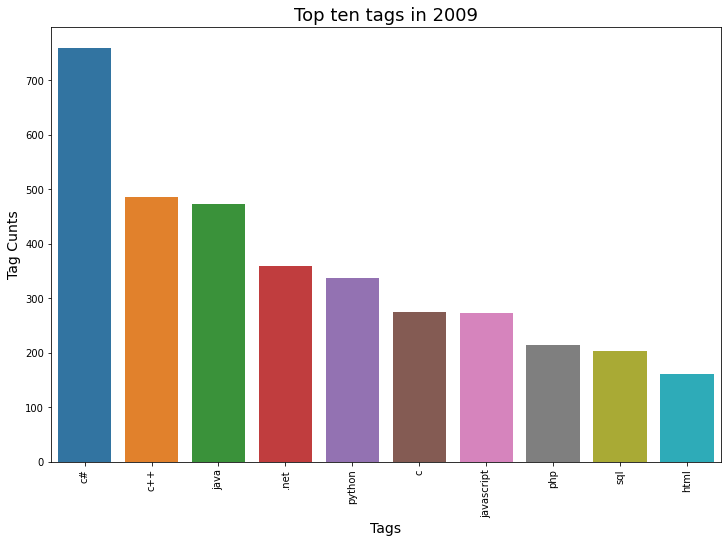

2010-01-22 00:27:09 2010-12-16 10:13:05
                      tag_count
Tag                            
c#                         1434
c++                        1137
java                       1057
javascript                  711
php                         710
...                         ...
java.util.concurrent          1
java.util.scanner             1
javacv                        1
javapos                       1
zxing                         1

[4505 rows x 1 columns]
2010


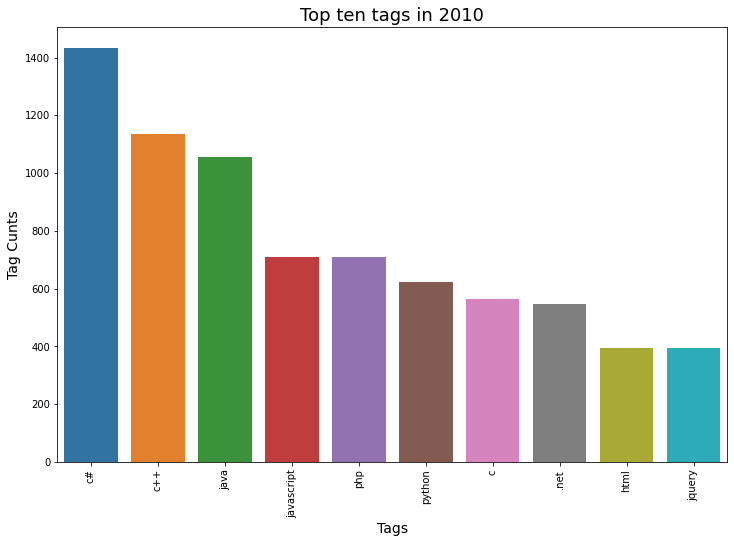

2011-01-02 22:29:02 2011-03-08 16:09:08
                    tag_count
Tag                          
c#                        167
java                      116
c++                       110
javascript                 87
php                        79
...                       ...
instance-variables          1
instanceof                  1
integration                 1
interactive                 1
zmodem                      1

[1203 rows x 1 columns]
2011


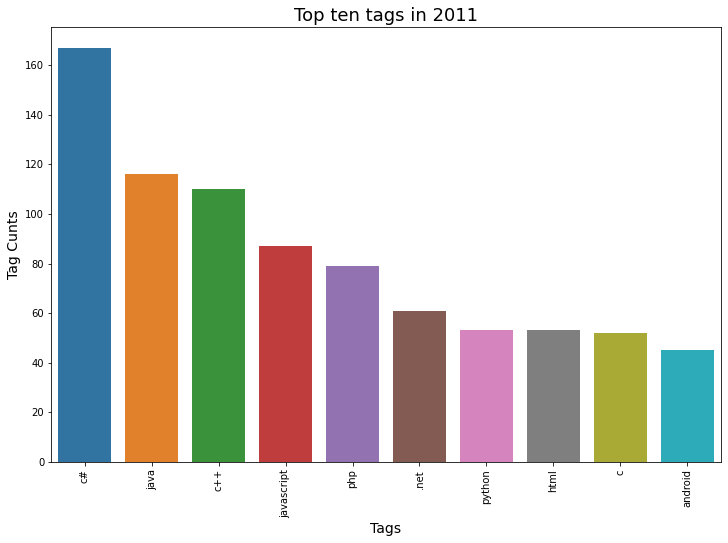

2012-01-20 22:36:33 2012-08-23 04:21:11
              tag_count
Tag                    
c#                 1324
java               1176
javascript          998
c++                 989
php                 760
...                 ...
j                     1
jailbreak             1
jain-sip              1
jakarta-mail          1
zxing                 1

[5142 rows x 1 columns]
2012


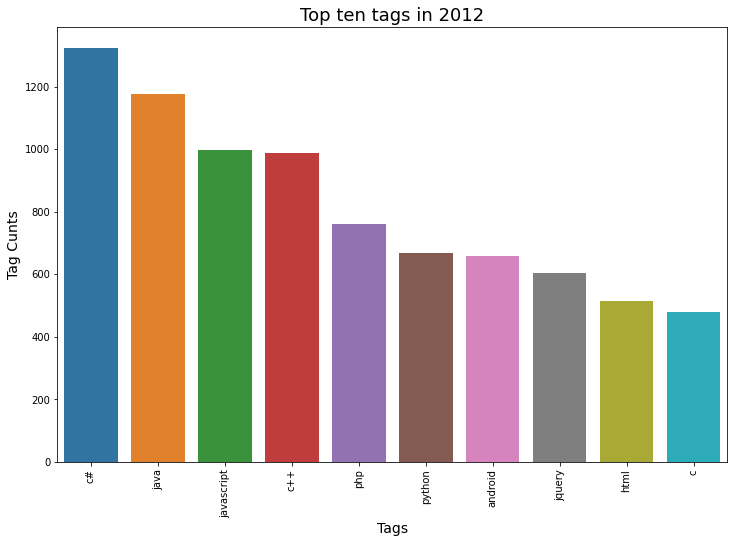

2013-07-24 12:28:08 2013-12-31 23:54:42
                 tag_count
Tag                       
java                   636
c#                     615
javascript             586
c++                    510
python                 394
...                    ...
image-size               1
imei                     1
inappbrowser             1
include                  1
zurb-foundation          1

[3545 rows x 1 columns]
2013


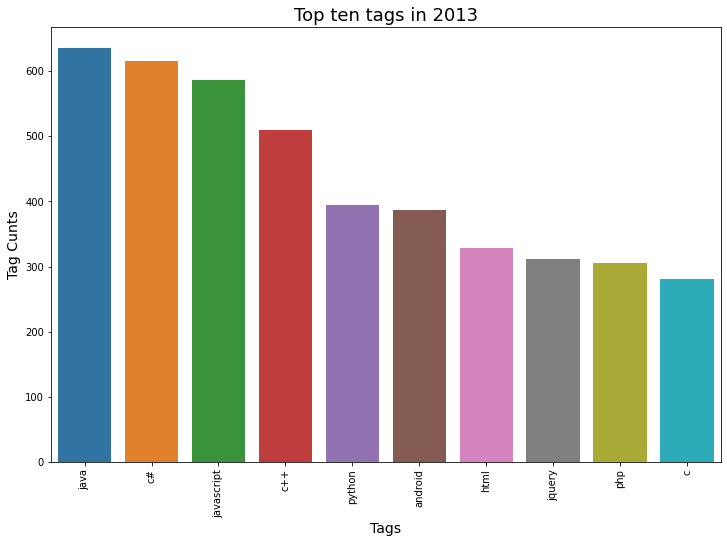

2014-01-01 00:21:10 2014-12-30 14:17:13
               tag_count
Tag                     
java                 247
c#                   193
c++                  188
javascript           180
android              162
...                  ...
mediarecorder          1
media-queries          1
mcrypt                 1
maybe                  1
zshrc                  1

[2035 rows x 1 columns]
2014


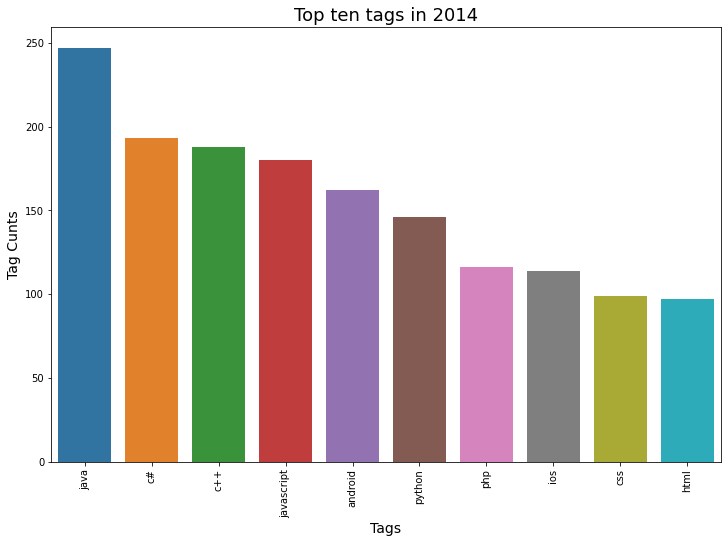

2015-01-02 10:25:31 2015-04-08 05:42:26
                        tag_count
Tag                              
javascript                    228
java                          224
c++                           180
c#                            170
python                        155
...                           ...
html-escape-characters          1
html-escape                     1
hsv                             1
href                            1
zip                             1

[2043 rows x 1 columns]
2015


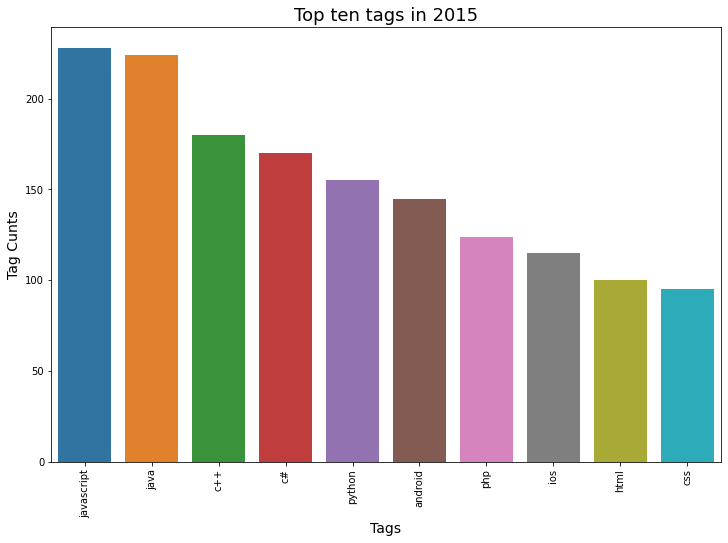

2016-01-23 04:25:34 2016-07-15 19:29:53
                   tag_count
Tag                         
javascript               488
python                   432
java                     390
android                  362
c#                       344
...                      ...
cryptojs                   1
css-loader                 1
method-missing             1
css-modules                1
zurb-foundation-6          1

[3087 rows x 1 columns]
2016


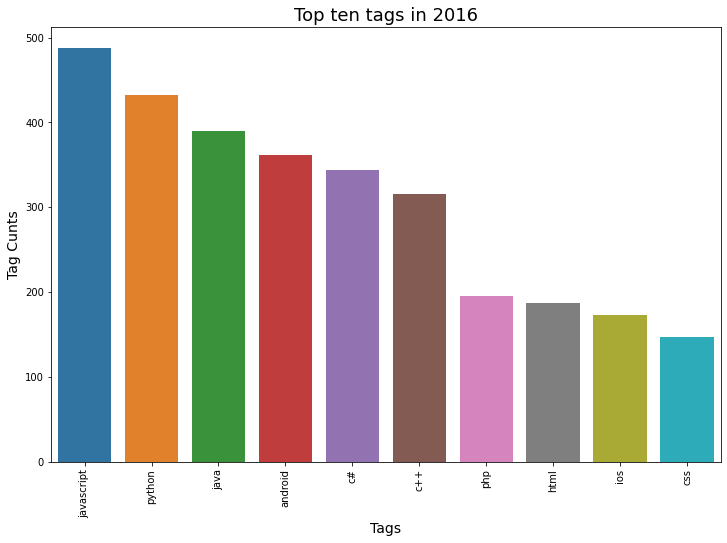

2017-06-07 06:39:53 2017-11-06 18:47:07
                     tag_count
Tag                           
python                     444
javascript                 433
java                       338
android                    292
c#                         250
...                        ...
bluegiga                     1
jvm-hotspot                  1
bluetooth-lowenergy          1
jupyter-console              1
jsonschema2pojo              1

[2950 rows x 1 columns]
2017


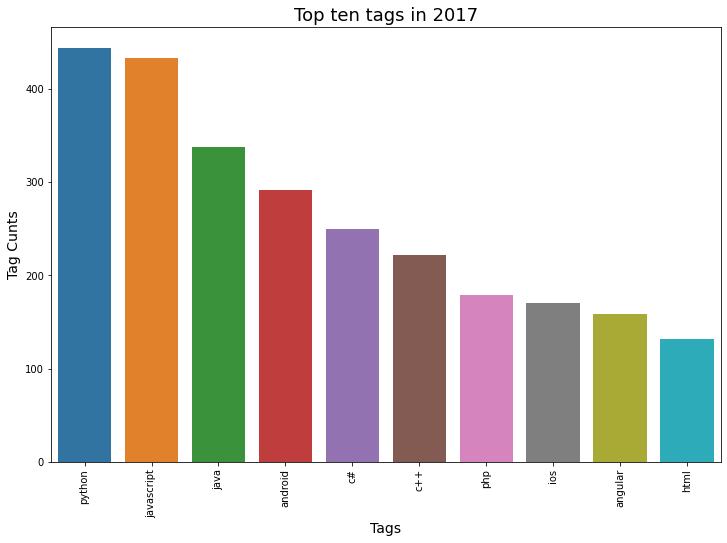

2018-11-03 09:15:37 2018-12-29 01:04:38
                         tag_count
Tag                               
python                         150
java                           138
javascript                     133
c++                             78
c#                              76
...                            ...
heroku-pipelines                 1
higher-order-components          1
hijri                            1
history                          1
zsh                              1

[1299 rows x 1 columns]
2018


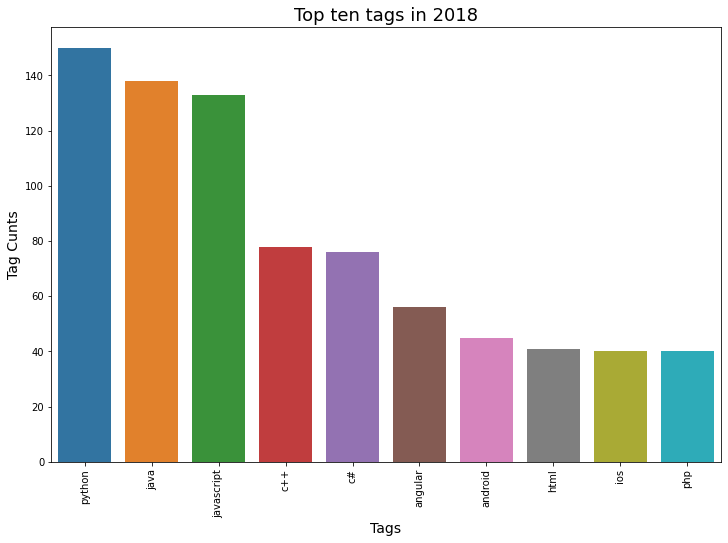

2019-01-01 11:13:04 2019-04-24 05:19:01
            tag_count
Tag                  
python            230
javascript        229
java              160
android           116
c++               110
...               ...
header              1
hdf                 1
hazelcast           1
hashset             1
zxing               1

[1705 rows x 1 columns]
2019


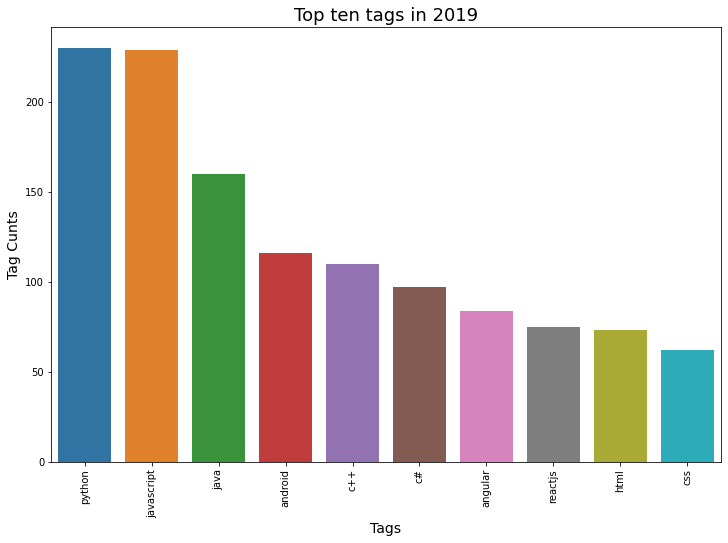

2020-04-27 21:19:29 2020-12-31 03:38:04
                          tag_count
Tag                                
python                          215
javascript                      178
c++                             139
java                            107
c#                               91
...                             ...
google-cloud-composer             1
google-calendar-api               1
google-bigquery                   1
google-api-python-client          1
zsh                               1

[1554 rows x 1 columns]
2020


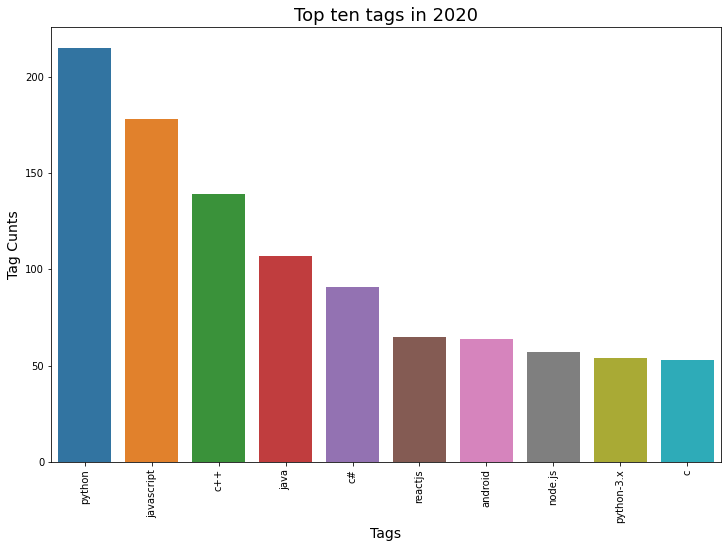

In [25]:
y = df.CreationDate.min().year
while y < years[-1]: # the data for 2021 is not enough
    
    dft = df[df['CreationDate'].dt.year == y]
    print(dft.CreationDate.min(), dft.CreationDate.max())
    tags = count_split_tags(dft, 'Tags', ',')
    print(tags)
    # Plot the results of splits
    fig = plt.figure(figsize=(12,8))
    ax = sns.barplot(data=tags.iloc[0:10, :],
                x=tags.iloc[0:10, :].index,
                y="tag_count")
    print(y)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.title("Top ten tags in "+ str(y), fontsize=18)
    ax.set_xlabel("Tags", size=14)
    ax.set_ylabel("Tag Cunts", size=14)
    plt.show()    

    y+=1

**We see that the top 10 languages and frameworks change over the years, python was the 5th now it is 1st**

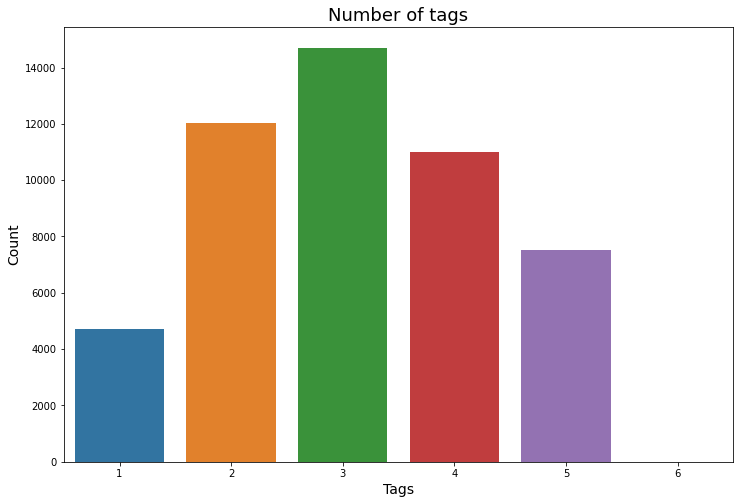

In [26]:
# Create a list of Tags and count the number
df['TagsList'] = df['Tags'].str.split(',')
df['TagsCount'] = df['TagsList'].apply(lambda x: len(x))

# Plot the result
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.TagsCount)
ax.set_xlabel("Tags", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.title("Number of tags", fontsize=18)
plt.show()

**The average number of tags is 3 for all questions.**

**The top 50 tags illustrated in the graphs above are sufficient for the purpose of filtering the data and especially to optimize the calculation time.**

In [27]:
tags_words.iloc[0:50].index

Index(['c#', 'java', 'javascript', 'c++', 'python', 'php', 'android', 'c',
       'html', 'jquery', '.net', 'css', 'ios', 'sql', 'mysql', 'algorithm',
       'sql-server', 'asp.net', 'arrays', 'performance', 'string',
       'objective-c', 'linux', 'regex', 'iphone', 'r', 'multithreading',
       'windows', 'node.js', 'git', 'ruby-on-rails', 'ruby', 'json', 'c++11',
       'swift', 'asp.net-mvc', 'django', 'angular', 'database', 'bash',
       'xcode', 'visual-studio', 'python-3.x', 'eclipse', 'delphi', 'wpf',
       'spring', 'reactjs', 'ajax', 'perl'],
      dtype='object', name='Tag')

In [28]:
df['TagsList']

0        [c#, asp.net, web-services, exchange-server-20...
1                              [javascript, jquery, clone]
2        [flutter, dart, bloc, state-management, flutte...
3                                                 [python]
4                                            [java, swing]
                               ...                        
49995            [android, react-native, mobx, mobx-react]
49996                                     [python, pytest]
49997        [javascript, fft, html5-audio, web-audio-api]
49998                                 [python, dictionary]
49999             [ssl-certificate, haproxy, lets-encrypt]
Name: TagsList, Length: 50000, dtype: object

In [29]:
top_tags = list(tags_words.iloc[0:50].index)
df.TagsList = df.TagsList.apply(lambda x: filter_tag(x, top_tags))
df['NumberOfTags'] = df.TagsList.apply(lambda x : len(x))
df = df[df.NumberOfTags > 0]
print(df.shape[0])

42729


In [30]:
df.loc[:,['TagsList','NumberOfTags']]

,TagsList,NumberOfTags
0,"[c#, asp.net]",2
1,"[javascript, jquery]",2
3,[python],1
4,[java],1
5,"[c#, c++]",2
...,...,...
49994,[c++],1
49995,[android],1
49996,[python],1
49997,[javascript],1


In [31]:
df.head(3)

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score,TagsList,TagsCount,NumberOfTags
0,3631531,2010-09-02 21:42:52,Extract Exchange 2007 Public Calendar Appointm...,<p>We have a public calendar for our company s...,"c#,asp.net,web-services,exchange-server-2007,e...",14024,5,2,25,"[c#, asp.net]",5,2
1,3631536,2010-09-02 21:43:21,jQuery: Finding cloned child in cloned parent?,<p>Let's say I have this jQuery extension meth...,"javascript,jquery,clone",1525,3,3,3,"[javascript, jquery]",3,2
3,37826361,2016-06-15 04:48:44,how to understand this example of __getattr__ ...,<p>Here is a snippet of example from Mark Lutz...,python,344,6,2,3,[python],1,1


#### Cleaning Data: Body

In [32]:
df.Body.head(3)

0    <p>We have a public calendar for our company s...
1    <p>Let's say I have this jQuery extension meth...
3    <p>Here is a snippet of example from Mark Lutz...
Name: Body, dtype: object

In [33]:
# Delete <code> in Body text
df.loc[:,'Body'] = df['Body'].apply(remove_code)
# Delete all html tags
df.loc[:,'Body'] = [BeautifulSoup(text,"lxml").get_text() for text in df['Body']]

In [34]:
df.Body.head(3)

0    We have a public calendar for our company set ...
1    Let's say I have this jQuery extension method:...
3    Here is a snippet of example from Mark Lutz's ...
Name: Body, dtype: object

In [35]:
# Create feature "lang" with langdetect library
df['ShortBody'] = df['Body'].apply(lambda x: x[0:50])
df['Languages'] = df['ShortBody'].apply(detect_lang)

In [36]:
df.Languages.unique()

array(['en', 'it', 'da', 'af', 'id', 'no', 'fr', 'ro', 'ca', 'tl', None,
       'de', 'hr', 'nl', 'cy', 'es', 'fi', 'cs', 'sv', 'et', 'pl', 'pt',
       'sk', 'sq'], dtype=object)

In [37]:
df.Languages.value_counts(normalize=True)

en    0.984008
no    0.002997
it    0.002552
fr    0.002412
da    0.001428
ca    0.001335
af    0.000983
tl    0.000749
nl    0.000679
sv    0.000468
ro    0.000445
et    0.000375
id    0.000304
de    0.000258
es    0.000258
hr    0.000234
pt    0.000211
cy    0.000117
pl    0.000070
sk    0.000047
cs    0.000023
fi    0.000023
sq    0.000023
Name: Languages, dtype: float64

**We note that English is the most used language with 98%, so it is useless to keep the other languages.**

In [38]:
df = df[df.Languages == 'en']

In [39]:
# We test if the other languages have been removed.
df.Languages.value_counts(normalize=True)

en    1.0
Name: Languages, dtype: float64

### NLP process

#### Cleanning Body

In [49]:
# Spacy features
nlp = spacy.load("en_core_web_sm")
pos_list = ["NOUN","PROPN"]

df['BodyCleaned'] = df.Body.apply(lambda x : text_cleaner(x, nlp, pos_list, "english"))

In [50]:
df['BodyCleaned'].head()

0    [calendar, company, exchange, public, folder, ...
1          [jquery, extension, method, child, element]
3    [snippet, example, mark, lutz, book, python, n...
4    [class, class, system, print, call, applicatio...
5    [process, com, server, eye, thing, server, ser...
Name: BodyCleaned, dtype: object

Text(0.5, 1.0, 'Body tokens lenght')

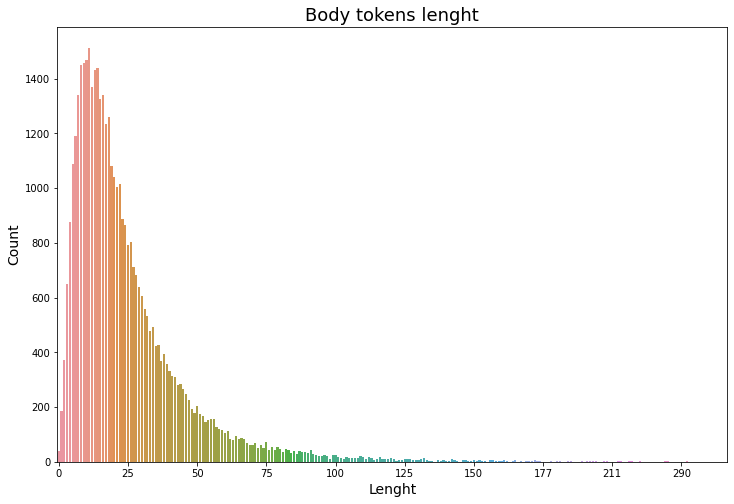

In [51]:
# Calculate lenght of each list in Body
df['BodyTokensCount'] = [len(s) for s in df.BodyCleaned]

# Countplot of body lenght
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.BodyTokensCount)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Lenght", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.title("Body tokens lenght", fontsize=18)

In [52]:
corpus_body = []
for i in df.BodyCleaned:
    corpus_body.extend(i)

In [53]:
corpus_body

['calendar',
 'company',
 'exchange',
 'public',
 'folder',
 'calendar',
 'appointment',
 'day',
 'code',
 'example',
 'calendar',
 'information',
 'public',
 'folder',
 'calendar',
 'life',
 'code',
 'calendar',
 'appointment',
 'list',
 'suggestion',
 'thanks',
 'added',
 'person',
 'problem',
 'generation',
 'updated',
 'ignorance',
 'project',
 'net',
 'added',
 'code',
 'solution',
 'code',
 'example',
 'code',
 'thanks',
 'oleg',
 'code',
 'folder',
 'part',
 'code',
 'example',
 'findappointments',
 'method',
 'example',
 'html',
 'string',
 'appointment',
 'base',
 'back',
 'answer',
 'jquery',
 'extension',
 'method',
 'child',
 'element',
 'snippet',
 'example',
 'mark',
 'lutz',
 'book',
 'python',
 'name',
 'access',
 'getattr',
 'metaclass',
 'question',
 'bupper',
 'spam',
 'bupper',
 'getattrbdata',
 'upper',
 'call',
 'getattr',
 'upper',
 'error',
 'nameerror',
 'name',
 'upper',
 'path',
 'bupper',
 'getattr',
 'value',
 'argument',
 'value',
 'argument',
 'getattrcls

In [54]:
# Calculate distribition of words in Body token list
BodyDist = nltk.FreqDist(corpus_body)
BodyDist = pd.DataFrame(BodyDist.most_common(1000), columns=['Word', 'Frequency'])

In [55]:
BodyDist.head()

,Word,Frequency
0,code,22209
1,file,15742
2,way,13799
3,error,11561
4,problem,11039


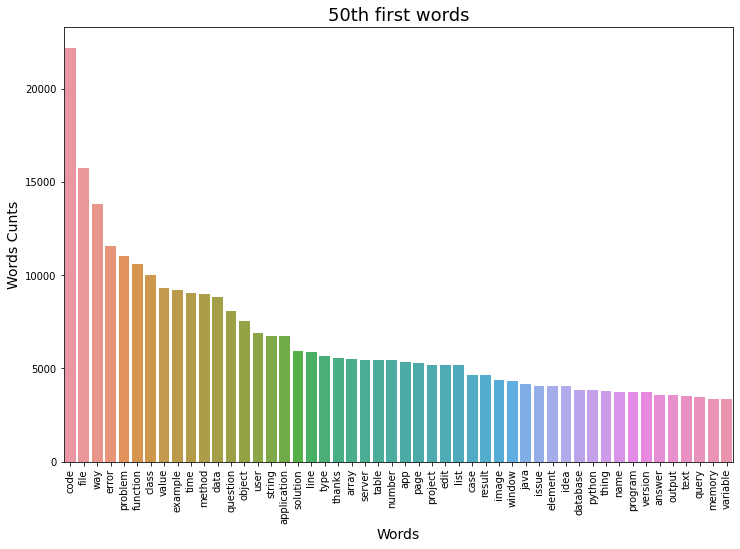

In [56]:
# Plot the results of splits
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(data=BodyDist.iloc[0:50,:],
            x=BodyDist.iloc[0:50,:].Word,
            y=BodyDist.iloc[0:50,:].Frequency)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("50th first words", fontsize=18)
ax.set_xlabel("Words", size=14)
ax.set_ylabel("Words Cunts", size=14)
plt.show()

#### Cleaning Tile

In [43]:
# Spacy features
nlp = spacy.load("en_core_web_sm")
pos_list = ["NOUN","PROPN"]
# Apply full cleaner on Title
start_time = time.time()
df['TitleCleaned'] = df.Title.apply(lambda x: text_cleaner(x, nlp, pos_list,"english"))

In [44]:
df['TitleCleaned'].head()

0    [extract, exchange, public, calendar, appointm...
1                     [jquery, finding, child, parent]
3                [example, getattr, metaclass, method]
4                                          [systemout]
5         [process, com, reference, process, boundary]
Name: TitleCleaned, dtype: object

Text(0.5, 1.0, 'Title tokens lenght')

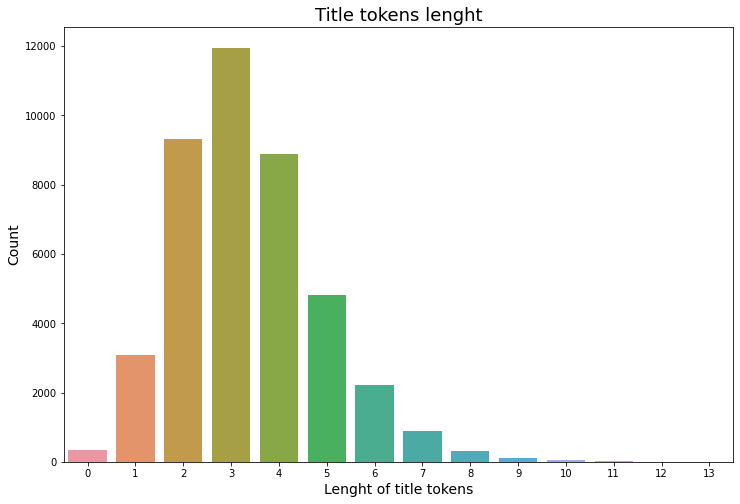

In [45]:
# Calculate lenght of each list in Title
df['TitleTokensCount'] = [len(s) for s in df.TitleCleaned]

# Countplot of Title lenght
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.TitleTokensCount)
ax.set_xlabel("Lenght of title tokens", size=14)
ax.set_ylabel("Count", size=14)
plt.title("Title tokens lenght", fontsize=18)

In [46]:
# Create a list of all tokens for Title
corpus_title = []
for i in df['TitleCleaned']:
    corpus_title.extend(i)

# Calculate distribition of words in Title token list
TitleDist = nltk.FreqDist(corpus_title)
TitleDist = pd.DataFrame(TitleDist.most_common(1000), columns=['Word', 'Frequency'])

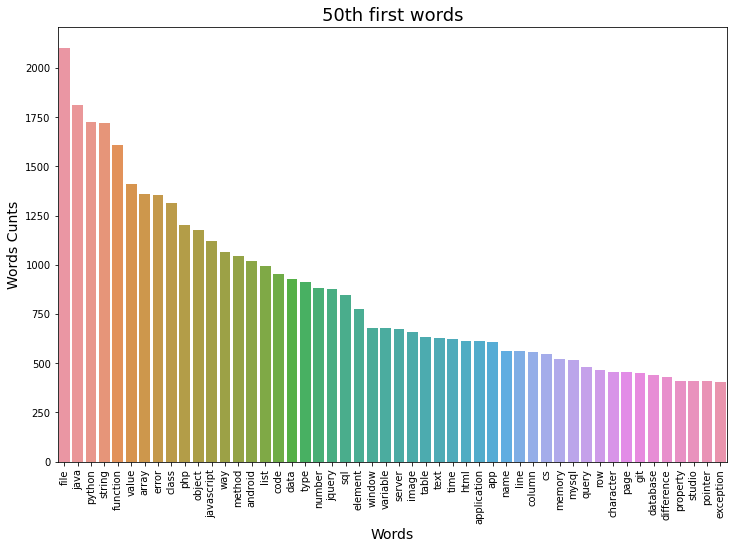

In [47]:
# Plot the results of splits
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(data=TitleDist.iloc[0:50,:],
            x=TitleDist.iloc[0:50,:].Word,
            y=TitleDist.iloc[0:50,:].Frequency)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("50th first words", fontsize=18)
ax.set_xlabel("Words", size=14)
ax.set_ylabel("Words Cunts", size=14)
plt.show()

Text(0.5, 1.0, 'Word Cloud of 100 most popular words on Title\n')

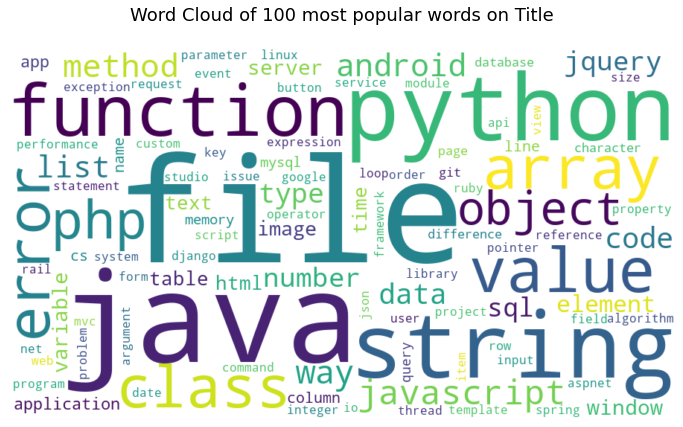

In [48]:
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="white",
                      max_words=100, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(TitleDist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 100 most popular words on Title\n", fontsize=18)

In [57]:
df_ML = df.copy()

In [58]:
df_ML.head(1)

,Id,CreationDate,Title,Body,Tags,ViewCount,CommentCount,AnswerCount,Score,TagsList,TagsCount,NumberOfTags,ShortBody,Languages,BodyCleaned,TitleCleaned,TitleTokensCount,BodyTokensCount
0,3631531,2010-09-02 21:42:52,Extract Exchange 2007 Public Calendar Appointm...,We have a public calendar for our company set ...,"c#,asp.net,web-services,exchange-server-2007,e...",14024,5,2,25,"[c#, asp.net]",5,2,We have a public calendar for our company set ...,en,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...",9,52


In [59]:
df_ML = df_ML[['Id','BodyCleaned','TitleCleaned','TagsList', 'Score']]

In [60]:
df_ML.head()

,Id,BodyCleaned,TitleCleaned,TagsList,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
1,3631536,"[jquery, extension, method, child, element]","[jquery, finding, child, parent]","[javascript, jquery]",3
3,37826361,"[snippet, example, mark, lutz, book, python, n...","[example, getattr, metaclass, method]",[python],3
4,4443878,"[class, class, system, print, call, applicatio...",[systemout],[java],11
5,4691968,"[process, com, server, eye, thing, server, ser...","[process, com, reference, process, boundary]","[c#, c++]",6


In [61]:
# Rename columns
df_ML.columns = ['Id','Body','Title','Tags', 'Score']

In [62]:
df_ML.head()

,Id,Body,Title,Tags,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
1,3631536,"[jquery, extension, method, child, element]","[jquery, finding, child, parent]","[javascript, jquery]",3
3,37826361,"[snippet, example, mark, lutz, book, python, n...","[example, getattr, metaclass, method]",[python],3
4,4443878,"[class, class, system, print, call, applicatio...",[systemout],[java],11
5,4691968,"[process, com, server, eye, thing, server, ser...","[process, com, reference, process, boundary]","[c#, c++]",6


In [63]:
df_ML[df_ML.Body.str.len()==0].head()

,Id,Body,Title,Tags,Score
1848,3138600,[],"[use, stat]",[c],20
2059,3150026,[],"[int, int, pointer]",[c],6
2646,64094754,[],"[remainder, size, compile, time]",[c++],5
4320,3661545,[],[],"[c#, performance]",19
4646,3682926,[],"[string, parameter, default, value]","[c#, .net]",3


In [64]:
df_ML[df_ML.Body.str.len()>0].index.shape

(41987,)

In [65]:
#drop the Body, Title and Tags with 
df_ML = df_ML[(df_ML.Body.str.len()>0) & (df_ML.Title.str.len()>0) & (df_ML.Tags.str.len()>0) & (df_ML.Score>1)]

In [66]:
#check if there is an empty body.  
df_ML[df_ML.Body.str.len()==0].index.shape

(0,)

In [67]:
#check if there is an empty title. 
df_ML[df_ML.Title.str.len()==0].index.shape

(0,)

In [68]:
#check if there is an empty tags. 
df_ML[df_ML.Tags.str.len()==0].index.shape

(0,)

In [69]:
#check if there is a score less than 1. 
df_ML.Score.min()

3

In [70]:
df_ML.head()

,Id,Body,Title,Tags,Score
0,3631531,"[calendar, company, exchange, public, folder, ...","[extract, exchange, public, calendar, appointm...","[c#, asp.net]",25
1,3631536,"[jquery, extension, method, child, element]","[jquery, finding, child, parent]","[javascript, jquery]",3
3,37826361,"[snippet, example, mark, lutz, book, python, n...","[example, getattr, metaclass, method]",[python],3
4,4443878,"[class, class, system, print, call, applicatio...",[systemout],[java],11
5,4691968,"[process, com, server, eye, thing, server, ser...","[process, com, reference, process, boundary]","[c#, c++]",6


In [71]:
# Save to pickle the data that will be used in the modeling.
df_ML.to_pickle('pickle_df_ML.pkl')